In [1]:
import pandas as pd
import gc
from google.colab import drive
drive.mount('/content/drive')

data_root = '/content/drive/MyDrive/부트캠프/'
data_path = data_root + '11_파이널/'

Mounted at /content/drive


In [ ]:
origin_train = pd.read_parquet(data_path + 'processed/train_all.parquet')
origin_test = pd.read_parquet(data_path + 'processed/test_all.parquet')

In [2]:
segment = pd.read_csv(data_path + 'processed/segment.csv')
# segment['abc'] = segment['Segment'].isin(['A', 'B', 'C']).astype(int)
dmm = pd.get_dummies(segment['Segment'])
dmm

,A,B,C,D,E
0,False,False,False,True,False
1,False,False,False,False,True
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,False,False,True
...,...,...,...,...,...
2399995,False,False,False,False,True
2399996,False,False,False,True,False
2399997,False,False,True,False,False
2399998,False,False,False,False,True


In [5]:
dmm = dmm.astype(int)
dmm[dmm.select_dtypes(include='int64').columns] = dmm.select_dtypes(include='int64').astype('int8')
dmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   A       int8 
 1   B       int8 
 2   C       int8 
 3   D       int8 
 4   E       int8 
dtypes: int8(5)
memory usage: 11.4 MB


In [6]:
dmm.to_csv(data_path + 'data/one_hot_encoding.csv', index=False)

In [ ]:
segment['abc'].value_counts()

,count
abc,
0,2271294
1,128706


In [ ]:
origin_train['abc'] = segment['abc']
train_abc = origin_train[origin_train['abc'] == 1]
train_abc.drop('abc', axis=1, inplace=True)
del origin_train
gc.collect()

/tmp/ipython-input-5-1417865030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_abc.drop('abc', axis=1, inplace=True)


27

In [ ]:
train_abc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128706 entries, 2 to 2399997
Columns: 312 entries, 기준년월 to 변동률_RV평잔
dtypes: float64(32), int16(75), int32(69), int8(135), object(1)
memory usage: 102.2+ MB


In [ ]:
train_abc.describe()

,기준년월,이용금액_R3M_신용체크,입회경과개월수_신용,_1순위카드이용금액,회원여부_이용가능_카드론,이용거절여부_카드론,최종카드발급경과월,이용금액_R3M_신용,_1순위카드이용건수,이용금액_R3M_체크,...,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,잔액_한도소진율,증감율_카드론_분기,증감율_일시불_분기,증감율_체크_분기,증감율_카드론_전월,변동률_RV평잔
count,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,...,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000,128706.000000
mean,201809.500000,60932.094059,132.958293,36419.111083,0.605791,0.139667,21.865546,54949.460608,90.461820,5982.505718,...,0.008354,-0.006580,1.282312,1.552829,1.636726,-0.080545,0.009512,-0.018100,-0.019099,0.322236
std,1.707832,37526.378829,81.039980,23739.034258,0.488682,0.346643,13.104650,37348.203123,67.503828,16894.802456,...,0.219016,0.089807,3.954332,4.736590,2.788285,1.715349,0.903762,1.523799,1.647457,0.213493
min,201807.000000,-5349.000000,2.000000,-3148.000000,0.000000,0.000000,0.000000,-5349.000000,-2.000000,0.000000,...,-1.999996,-1.999996,-2.043888,-2.185794,-2.104217,-9.172030,-4.689911,-7.880561,-41.051497,-5.930751
25%,201808.000000,29029.500000,65.000000,16460.250000,0.000000,0.000000,12.000000,22018.000000,27.000000,0.000000,...,-0.087634,0.000000,0.041816,0.063160,-0.615323,0.143423,-0.364885,0.086480,0.048726,0.321733
50%,201809.500000,60344.500000,117.000000,35105.000000,1.000000,0.000000,21.000000,52140.000000,83.000000,0.000000,...,0.000000,0.000000,1.073787,1.315583,0.972889,0.143423,0.047652,0.086480,0.048726,0.321733
75%,201811.000000,89765.000000,204.000000,53973.750000,1.000000,0.000000,31.000000,84315.750000,153.000000,1798.000000,...,0.091871,0.000000,1.855054,2.125543,3.413538,0.143423,0.424962,0.086480,0.048726,0.321733
max,201812.000000,235195.000000,326.000000,118507.000000,1.000000,1.000000,64.000000,163706.000000,222.000000,163250.000000,...,1.999996,1.999996,99.999800,99.999800,11.613613,9.458876,5.398246,8.053521,0.048726,3.633717


In [ ]:
train_abc.columns

Index(['기준년월', 'ID', '이용금액_R3M_신용체크', '입회경과개월수_신용', '_1순위카드이용금액',
       '회원여부_이용가능_카드론', '이용거절여부_카드론', '최종카드발급경과월', '이용금액_R3M_신용', '_1순위카드이용건수',
       ...
       '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M', '혜택수혜율_R3M', '혜택수혜율_B0M', '잔액_한도소진율',
       '증감율_카드론_분기', '증감율_일시불_분기', '증감율_체크_분기', '증감율_카드론_전월', '변동률_RV평잔'],
      dtype='object', length=312)

In [ ]:
segment_abc = segment[segment['abc'] == 1]
y = segment_abc['Segment']
del segment_abc
del segment
gc.collect()
y

,Segment
2,C
8,C
37,C
39,C
55,C
...,...
2399911,C
2399953,C
2399987,C
2399993,C


In [ ]:
train_abc.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [ ]:
x = train_abc.drop(['ID','기준년월'], axis=1)
y_one = y == 'C'
y_one = y_one.astype(int)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_val, y_train1, y_val = train_test_split(x_scaled, y_one, test_size=0.2, random_state=42)
x_train, x_opt, y_train, y_opt = train_test_split(x_train1, y_train1, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
models ={}

In [ ]:
from lightgbm import LGBMClassifier

lgbm_params = {
    "booster": "dart",
    "max_depth": 12,
    "max_leaves": 180,
    "row_sample_rate": 0.6,
    "colsample_bytree": 0.9,
    "early_stopping_rounds": 50,
    "n_estimators": 1000,
}
lgbmModel = LGBMClassifier(**lgbmparams, random_state=42)
lgbmModel.fit(x_train, y_train)
y_pred = lgbmModel.predict(x_val)
f1_s = f1_score(y_val, y_pred, average='macro')
print(f"F1 score (macro): {f1_s:.4f}")
models['lgbm']= f1_s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 81647, number of negative: 724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.476621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44198
[LightGBM] [Info] Number of data points in the train set: 82371, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.991210 -> initscore=4.725369
[LightGBM] [Info] Start training from score 4.725369


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1 score (macro): 0.8081


In [ ]:
from xgboost import XGBClassifier

xgbparams={
    "booster": "dart",
    "max_depth": 4,
    "max_leaves": 96,
    "early_stopping_rounds": 20,
    "n_estimators": 1000,
    "device": "cuda",
    "tree_method": "hist",
    "silent": 1,
}
xgbModel = XGBClassifier(**xgbparams, random_state=42)
xgbModel.fit(x_train, y_train)
y_pred = xgbModel.predict(x_val)
f1_s = f1_score(y_val, y_pred, average='macro')
print(f"F1 score (macro): {f1_s:.4f}")
models['xgb']= f1_s

F1 score (macro): 0.8955


In [ ]:
from catboost import CatBoostClassifier

catModel = CatBoostClassifier(random_state=42)
catModel.fit(x_train, y_train)
y_pred = catModel.predict(x_val)
f1_s = f1_score(y_val, y_pred, average='macro')
print(f"F1 score (macro): {f1_s:.4f}")
models['cat']= f1_s

Learning rate set to 0.067759
0:	learn: 0.5450978	total: 260ms	remaining: 4m 19s
1:	learn: 0.4215357	total: 375ms	remaining: 3m 7s
2:	learn: 0.3190411	total: 509ms	remaining: 2m 49s
3:	learn: 0.2523580	total: 619ms	remaining: 2m 34s
4:	learn: 0.2001787	total: 760ms	remaining: 2m 31s
5:	learn: 0.1606756	total: 894ms	remaining: 2m 28s
6:	learn: 0.1293822	total: 1.01s	remaining: 2m 23s
7:	learn: 0.1051728	total: 1.12s	remaining: 2m 18s
8:	learn: 0.0882057	total: 1.26s	remaining: 2m 18s
9:	learn: 0.0751091	total: 1.38s	remaining: 2m 16s
10:	learn: 0.0662870	total: 1.51s	remaining: 2m 15s
11:	learn: 0.0593348	total: 1.63s	remaining: 2m 14s
12:	learn: 0.0510670	total: 1.75s	remaining: 2m 12s
13:	learn: 0.0477349	total: 1.89s	remaining: 2m 12s
14:	learn: 0.0444847	total: 2.01s	remaining: 2m 11s
15:	learn: 0.0417568	total: 2.12s	remaining: 2m 10s
16:	learn: 0.0383397	total: 2.27s	remaining: 2m 11s
17:	learn: 0.0359160	total: 2.38s	remaining: 2m 9s
18:	learn: 0.0339194	total: 2.49s	remaining: 2

In [ ]:
from sklearn.ensemble import VotingClassifier

soft_voting_model = VotingClassifier(estimators=[('lgbm', lgbmModel), ('xgb', xgbModel), ('cat', catModel)], voting='soft')
soft_voting_model.fit(x_train, y_train)
y_pred = soft_voting_model.predict(x_val)
f1_s = f1_score(y_val, y_pred, average='macro')
print(f"F1 score (macro): {f1_s:.4f}")
models['soft']= f1_s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 81647, number of negative: 724
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.312635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44198
[LightGBM] [Info] Number of data points in the train set: 82371, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.991210 -> initscore=4.725369
[LightGBM] [Info] Start training from score 4.725369
Learning rate set to 0.067759
0:	learn: 0.5450978	total: 121ms	remaining: 2m 1s
1:	learn: 0.4215357	total: 259ms	remaining: 2m 9s
2:	learn: 0.3190411	total: 385ms	remaining: 2m 7s
3:	learn: 0.2523580	total: 495ms	remaining: 2m 3s
4:	learn: 0.2001787	total: 624ms	remaining: 2m 4s
5:	learn: 0.1606756	total: 757ms	remaining: 2m 5s
6:	learn: 0.1293822	total: 870ms	remaining: 2m 3s
7:	learn: 0.1051728	total: 982ms	remaining: 2m 1s
8:	learn: 0.08

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1 score (macro): 0.8427


In [ ]:
hard_voting_model = VotingClassifier(estimators=[('lgbm', lgbmModel), ('xgb', xgbModel), ('cat', catModel)], voting='hard')
hard_voting_model.fit(x_train, y_train)
y_pred = hard_voting_model.predict(x_val)
f1_s = f1_score(y_val, y_pred, average='macro')
print(f"F1 score (macro): {f1_s:.4f}")
models['hard']= f1_s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 81647, number of negative: 724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.707467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44198
[LightGBM] [Info] Number of data points in the train set: 82371, number of used features: 303
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.991210 -> initscore=4.725369
[LightGBM] [Info] Start training from score 4.725369
Learning rate set to 0.067759
0:	learn: 0.5450978	total: 145ms	remaining: 2m 24s
1:	learn: 0.4215357	total: 287ms	remaining: 2m 23s
2:	learn: 0.3190411	total: 415ms	remaining: 2m 17s
3:	learn: 0.2523580	total: 531ms	remaining: 2m 12s
4:	learn: 0.2001787	total: 657ms	remaining: 2m 10s
5:	learn: 0.1606756	total: 809ms	remaining: 2m 13s
6:	learn: 0.1293822	total: 983ms	remaining: 2m 19s
7:	learn: 0.1051728	total: 1.17s	remaining: 2m 25s
8:	learn: 0.0882057	total: 1.4s	remaining: 2m 34s
9:	learn: 0.0751091	

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1 score (macro): 0.8467


In [ ]:
result_df = pd.DataFrame(models)
# result_df.sort_values(ascending=False, inplace=True)
result_df

,lgbm
0,0.808115
1,0.808115
2,0.895473
3,0.786171
4,0.842674
5,0.846665


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/utils/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

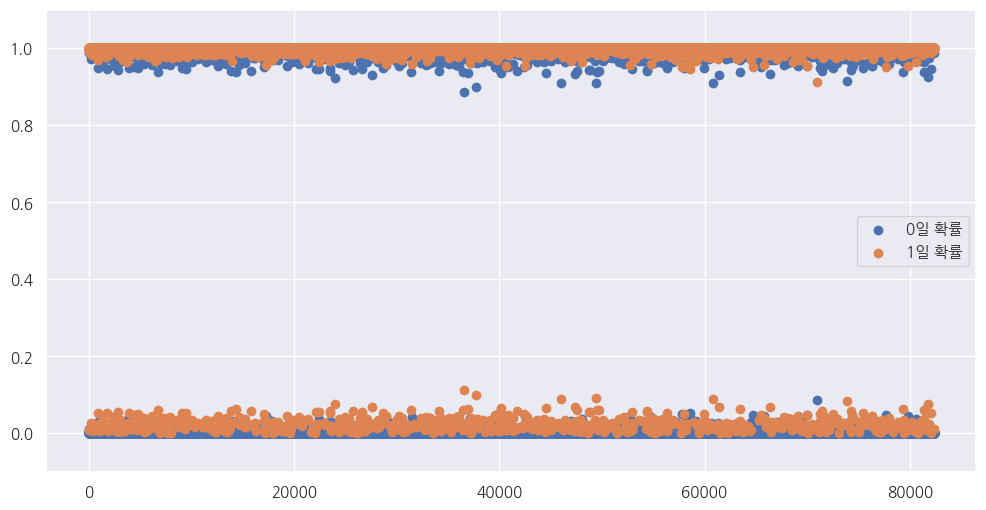

In [ ]:
# 예측 결과에 대한 확률 값을 가져온다
proba_a1 = xgbModel.predict_proba(x_train)
# 0일 확률
a10 = proba_a1[:, 0]
# 1일 확률
a20 = proba_a1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a20))), a20, label='1일 확률')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

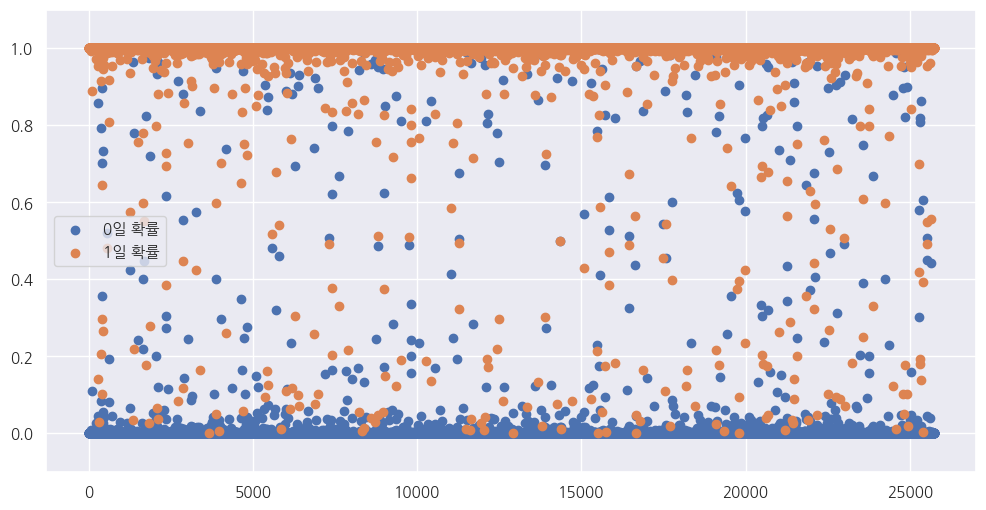

In [ ]:
# 예측 결과에 대한 확률 값을 가져온다
proba_a1 = xgbModel.predict_proba(x_val)
# 0일 확률
a10 = proba_a1[:, 0]
# 1일 확률
a20 = proba_a1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a20))), a20, label='1일 확률')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()